In [43]:
import pandas as pd
from pathlib import Path
fold_path = Path("../datasets/IM2GPS/human_geolocation_test_anon/")
stuff = pd.read_csv(fold_path/'coords.csv')
eval_set = stuff[stuff.pred.isna() == False]
eval_set

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907"
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294"
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999"
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455"
11,9,6,4,a6c79640-62dc-49db-bb44-63d6b6605caf.jpg,43.723242,10.394375,"43.722953, 10.396597"
15,30,44,53,7a300631-4ad9-477b-b3cc-569b3eeddcc5.jpg,-33.820764,18.474884,"-33.9628, 18.4098"
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951"
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496"
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966"
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708"


In [44]:
eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(', ')[0]))
eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(', ')[1]))
eval_set

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/3093291700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lat'] = eval_set.pred.apply(lambda x: float(x.split(', ')[0]))
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/3093291700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_lon'] = eval_set.pred.apply(lambda x: float(x.split(', ')[1]))


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred,pred_lat,pred_lon
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907",20.957668,105.770491
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294",-39.140212,175.625294
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999",41.898121,12.473152
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455",42.835170,-120.028454
11,9,6,4,a6c79640-62dc-49db-bb44-63d6b6605caf.jpg,43.723242,10.394375,"43.722953, 10.396597",43.722953,10.396597
15,30,44,53,7a300631-4ad9-477b-b3cc-569b3eeddcc5.jpg,-33.820764,18.474884,"-33.9628, 18.4098",-33.962800,18.409800
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951",63.430500,10.395100
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496",51.506912,-0.142850
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966",18.982827,72.808897
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708",-50.483070,-73.057708


In [45]:
from src.tools.geo_clip.inference import predict
from PIL import Image
from tqdm import tqdm
for i, row in tqdm(eval_set.iterrows()):
    geoclip_prediction = predict(Image.open(fold_path/row['image']), top_n=1)
    eval_set.at[i, 'geoclip_lat'] = geoclip_prediction[0][0][0]
    eval_set.at[i, 'geoclip_lon'] = geoclip_prediction[0][0][1]
eval_set

0it [00:00, ?it/s]/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/1922697041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set.at[i, 'geoclip_lat'] = geoclip_prediction[0][0][0]
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/1922697041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set.at[i, 'geoclip_lon'] = geoclip_prediction[0][0][1]
19it [00:56,  2.99s/it]


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image,latitude,longitude,pred,pred_lat,pred_lon,geoclip_lat,geoclip_lon
0,17,15,35,19b7a195-83f2-47de-b83b-90f01a136b4d.jpg,10.778840,106.688210,"20.9576676, 105.7704907",20.957668,105.770491,21.033300,105.849997
1,57,35,58,59a95a76-df66-401e-862c-87ced530535b.jpg,-37.515172,177.190246,"-39.140212, 175.625294",-39.140212,175.625294,-39.140212,175.625294
2,7,27,28,ec447c0e-9b6b-4d78-bcbf-272d74c37eb1.jpg,41.899262,12.472937,"41.8981206, 12.473151699999999",41.898121,12.473152,41.900592,12.478398
6,62,32,49,c6574360-2426-4cf7-b044-fe854cc5e873.jpg,41.446972,-117.792663,"42.83516963182199, -120.0284535201455",42.835170,-120.028454,45.584666,-118.621166
11,9,6,4,a6c79640-62dc-49db-bb44-63d6b6605caf.jpg,43.723242,10.394375,"43.722953, 10.396597",43.722953,10.396597,43.722655,10.395847
15,30,44,53,7a300631-4ad9-477b-b3cc-569b3eeddcc5.jpg,-33.820764,18.474884,"-33.9628, 18.4098",-33.962800,18.409800,-33.940494,18.375514
17,1,5,57,5636d9ca-e16e-4dc7-a7da-7df22b99a25f.jpg,63.433317,10.373840,"63.4305, 10.3951",63.430500,10.395100,63.438450,10.406198
20,0,48,6,0db9c46f-4e2c-41bb-8a35-f2e80967ee93.jpg,51.506699,-0.142908,"51.5069125, -0.1428496",51.506912,-0.142850,51.579903,-0.336714
21,18,0,18,251e07a5-d16b-4f2c-bc50-cb7a4d1e3bf5.jpg,18.986168,72.810859,"18.9828273, 72.8088966",18.982827,72.808897,18.642239,72.875747
22,4,9,26,163fcf66-509e-4ef8-a457-f87df38e9b74.jpg,-50.277931,-72.908020,"-50.48307, -73.057708",-50.483070,-73.057708,-50.483070,-73.057708


In [46]:
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set[['geoclip_dist', 'pred_dist']]

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/2594491122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_dist'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['latitude'], x['longitude'])['s12']/1000, axis=1)
/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/2594491122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['pred_dist'] = eval_set.apply(lambda x: geod.Inverse(x['latitude'], x['longitude'], x['pred_la

,geoclip_dist,pred_dist
0,1138.293828,1130.653853
1,226.405319,226.405319
2,0.476627,0.128023
6,464.556848,240.685732
11,0.135360,0.181901
15,16.151907,16.865806
17,1.713525,1.106833
20,15.719675,0.024097
21,38.679000,0.423610
22,25.180593,25.180593


In [47]:
eval_set['geoclip_dist'].describe()

count      19.000000
mean      143.469788
std       280.501199
min         0.135360
25%         2.142624
50%        16.151907
75%       142.945453
max      1138.293828
Name: geoclip_dist, dtype: float64

In [48]:
eval_set['pred_dist'].describe()

count      19.000000
mean      121.194955
std       278.311591
min         0.024097
25%         0.765221
50%         5.684805
75%        53.097276
max      1130.653853
Name: pred_dist, dtype: float64

<Axes: ylabel='Frequency'>

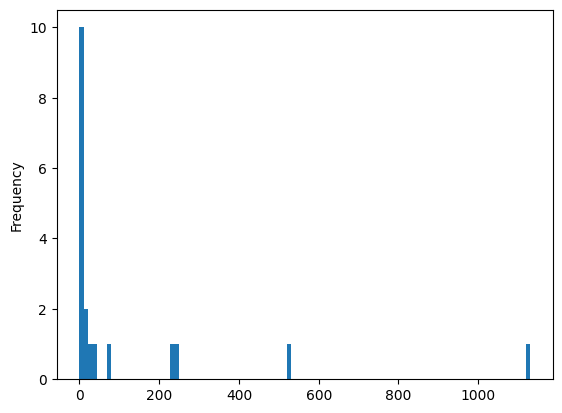

In [49]:
eval_set['pred_dist'].plot.hist(bins=100)

<Axes: ylabel='Frequency'>

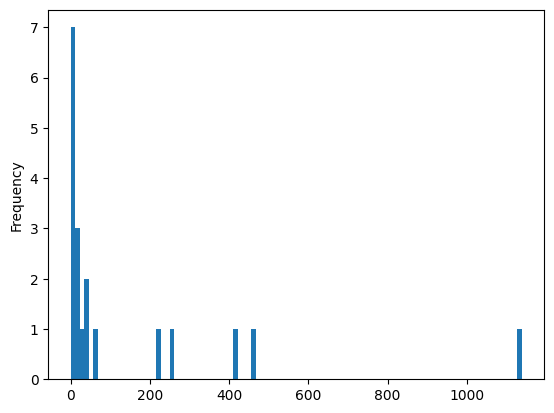

In [50]:
eval_set['geoclip_dist'].plot.hist(bins=100)

In [51]:
len(eval_set[eval_set['geoclip_dist'] < 1]), len(eval_set[eval_set['pred_dist'] < 1])

(3, 5)

In [52]:
eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)
eval_set['geoclip_pred_diff']

/var/folders/z5/ks9fxjt91y1dgv38xzprh08m0000gn/T/ipykernel_93297/1345777795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eval_set['geoclip_pred_diff'] = eval_set.apply(lambda x: geod.Inverse(x['geoclip_lat'], x['geoclip_lon'], x['pred_lat'], x['pred_lon'])['s12']/1000, axis=1)


0      11.766741
1       0.000000
2       0.514661
6     325.545172
11      0.068910
15      4.020720
17      1.045090
20     15.710822
21     38.352574
22      0.000000
25    256.247835
32      0.000000
33      1.167569
37      0.061152
41      0.000000
49      2.932737
52     16.203543
56     15.354795
63    674.157268
Name: geoclip_pred_diff, dtype: float64

In [53]:
eval_set['geoclip_pred_diff'].describe()

count     19.000000
mean      71.744715
std      171.709361
min        0.000000
25%        0.065031
50%        2.932737
75%       15.957183
max      674.157268
Name: geoclip_pred_diff, dtype: float64

<Axes: ylabel='Frequency'>

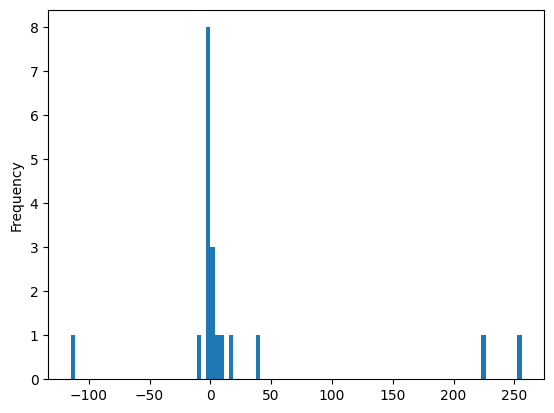

In [56]:
(eval_set['geoclip_dist'] - eval_set['pred_dist']).plot.hist(bins=100)